# Crop reccomendation model

This classification model recommends the most suitable crop according to the different agricultural variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

In [2]:
#Read data
crop_ds = pd.read_csv('../input/crop-recommendation-dataset/Crop_recommendation.csv')
crop_ds.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Data fields

* **N** - ratio of Nitrogen content in soil - kg/ha

* **P** - ratio of Phosphorous content in soil - kg/ha

* **K** - ratio of Potassium content in soil - kg/ha

* **temperature** - temperature in degree Celsius

* **humidity** - relative humidity in %

* **ph** - ph value of the soil

* **rainfall** - rainfall in mm

## Exploration

In [3]:
print("The Shape of the Dataset is: {}" .format(crop_ds.shape))

The Shape of the Dataset is: (2200, 8)


In [4]:
#Data types

crop_ds.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [5]:
#Descriptive Statistics

crop_ds.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
print("Number of labels: {}".format(crop_ds['label'].nunique()))
crop_ds['label'].value_counts()

Number of labels: 22


rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
# Check null values

crop_ds.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

## Data visualization

In [8]:
columns = crop_ds.columns[:-1]

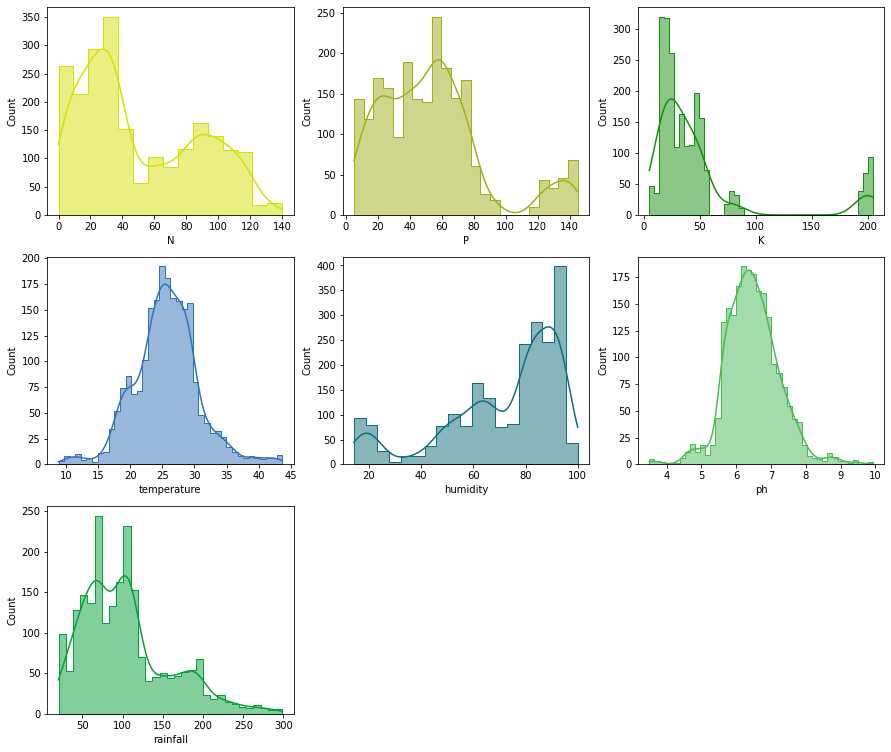

In [9]:
#Distribution
plt.figure(figsize=(15,13))
i = 1
for column in columns:
    plt.subplot(3,3,i)
    rgb = np.random.rand(3,)
    sns.histplot(crop_ds[column], kde = True, color = rgb, element = 'step')
    i+=1
plt.show()

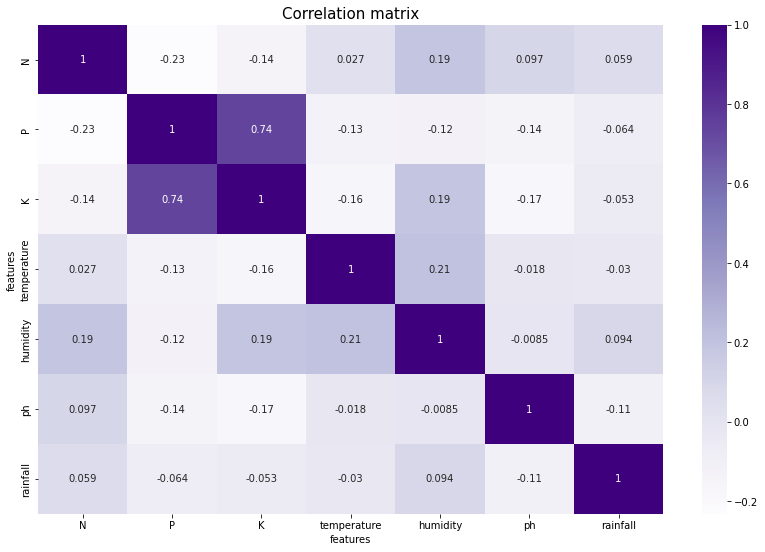

In [10]:
#Correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(14, 9))
sns.heatmap(crop_ds.corr(), annot=True,cmap='Purples')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation matrix', fontsize = 15, c='black')
plt.show()

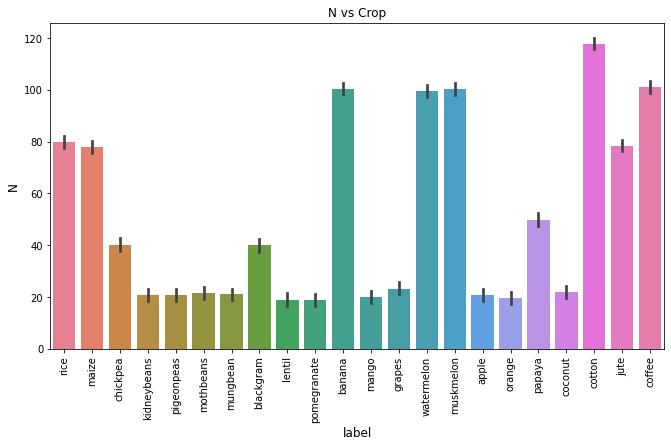

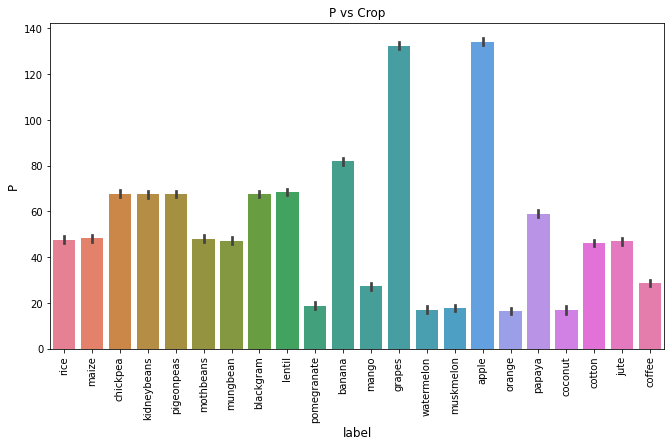

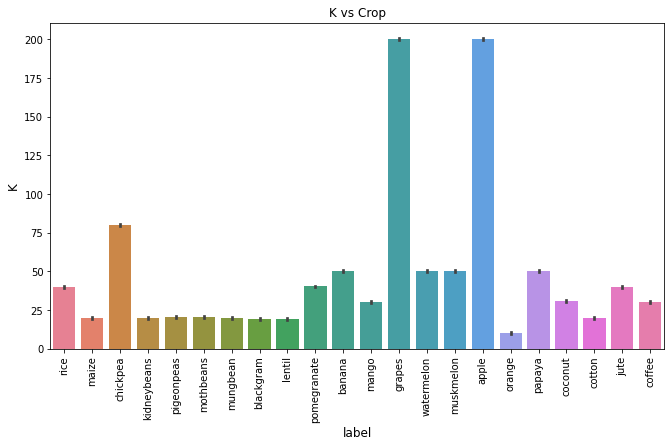

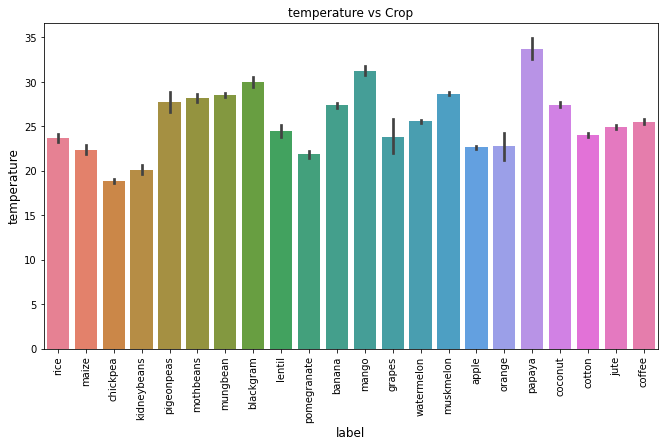

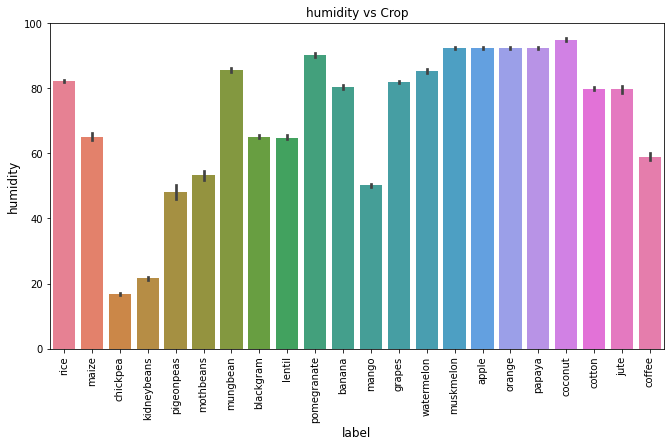

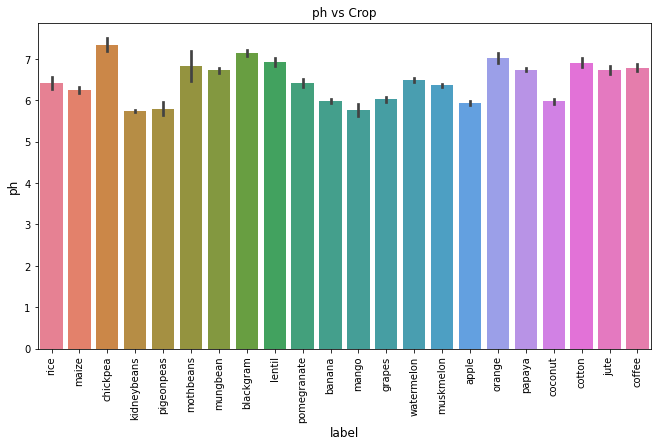

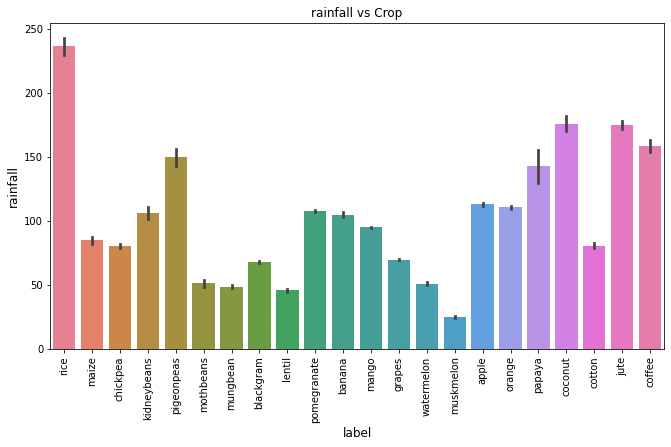

In [11]:
for column in columns:
    plt.figure(figsize = (11, 6))
    sns.barplot(x = 'label', y = column, data = crop_ds, palette = 'husl')
    plt.xlabel('label', fontsize = 12)
    plt.ylabel(column, fontsize = 12)
    plt.xticks(rotation=90)
    plt.title(f'{column} vs Crop')
    plt.show()

<Figure size 720x1224 with 0 Axes>

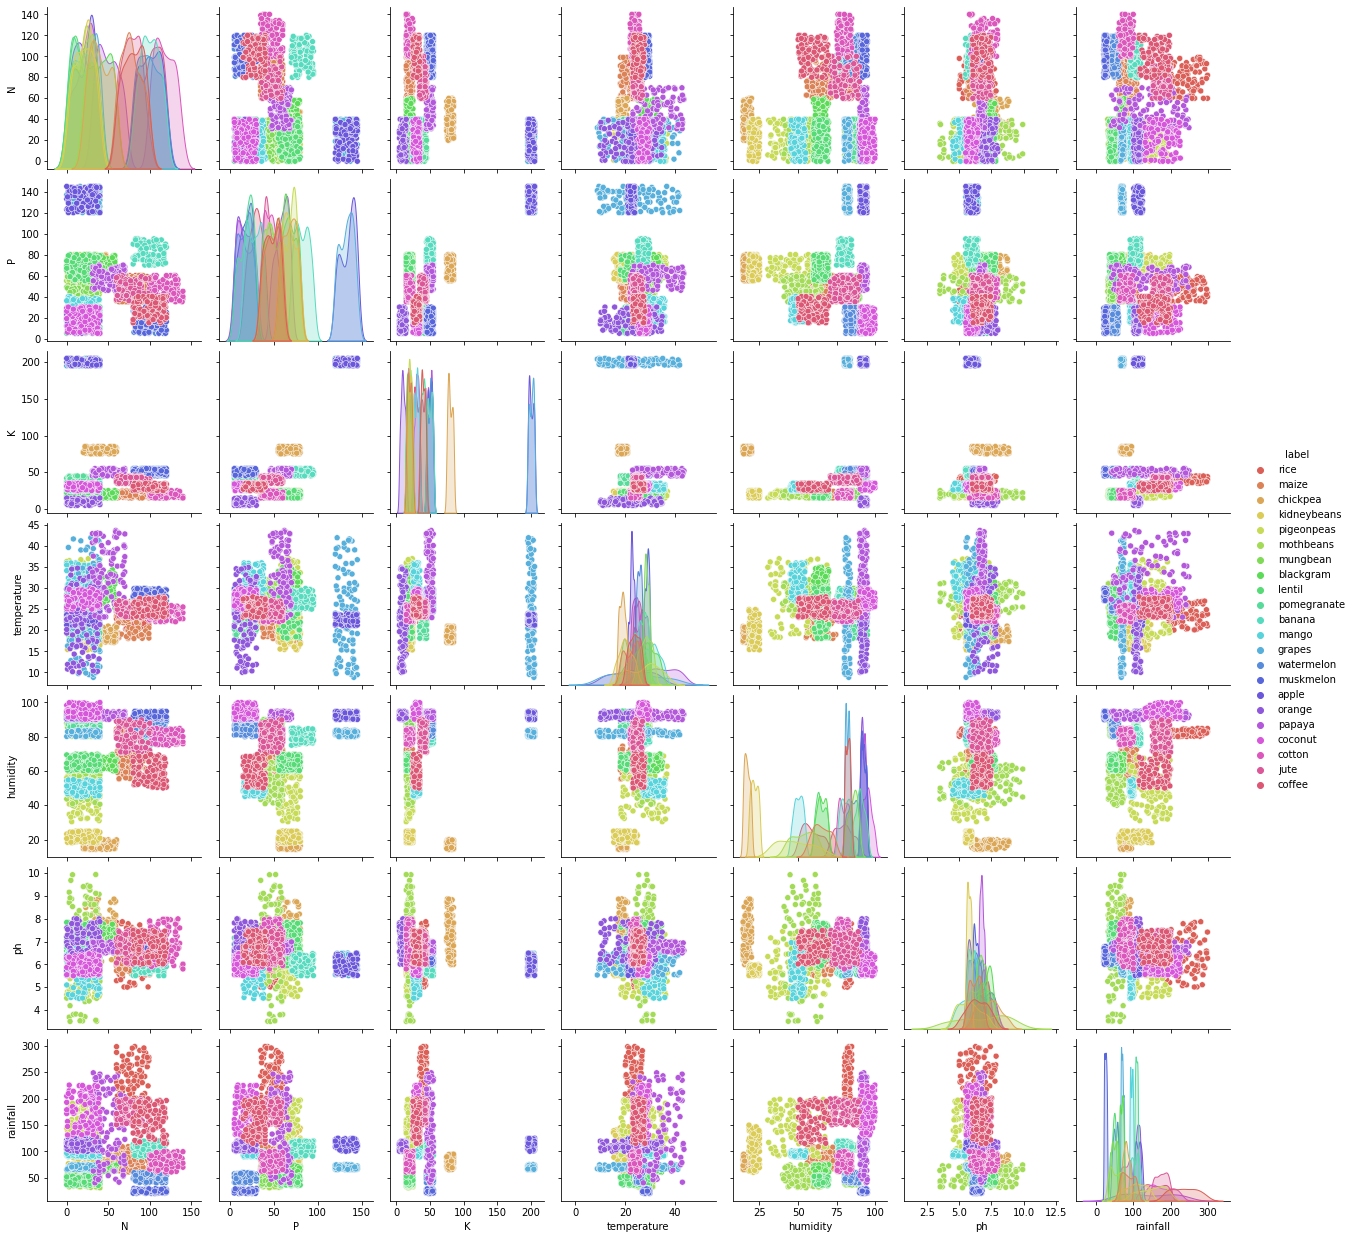

In [12]:
plt.figure(figsize = (10, 17))
sns.pairplot(crop_ds, hue = 'label', palette = 'hls')
plt.show()

## Random Forest Model

In [13]:
X = crop_ds.drop('label', axis =1)

y = crop_ds['label']

In [14]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
RF = RandomForestClassifier()

#Training
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [16]:
accuracy = metrics.accuracy_score(y_test,y_pred)

In [17]:
print('Accuracy: {}%'.format(round(accuracy * 100, 2)))

Accuracy: 99.77%


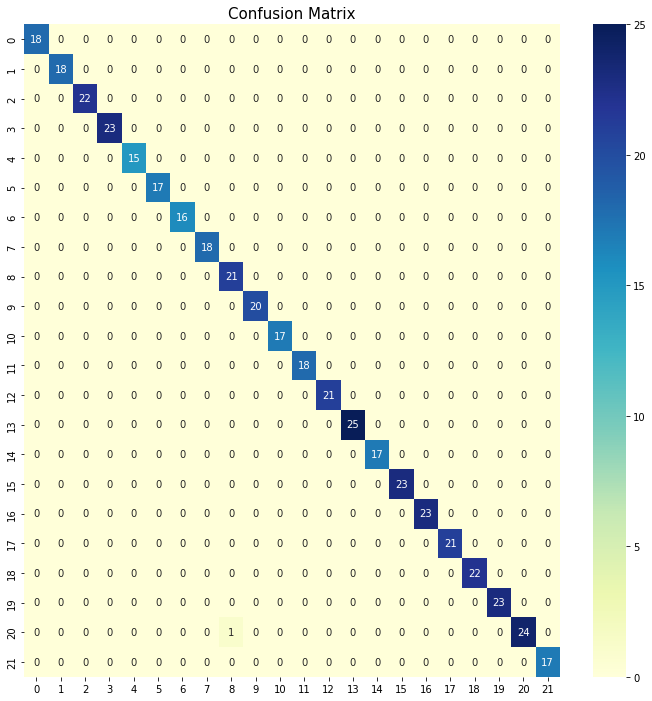

In [18]:
#Confusion matrix
plt.figure(figsize=(12,12))
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [19]:
report = metrics.classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      1.00      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [20]:
# save the model to disk
filename = 'crop_recommendation_model.sav'
pickle.dump(RF, open(filename, 'wb'))